# Les SVM : première rencontre

## 1 - Cas linéaire

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- Simuler un ensemble d’entraînement de dimension 2 linéairement séparable, c'est-à-dire que l'on peut séparer par une droite. Il devra être composé de 100 observations avec 2 caractéristiques chacune (*indication : on peut prendre par exemple y=1 pour x1 > 0.5*)
- Afficher cet ensemble en colorant par label.

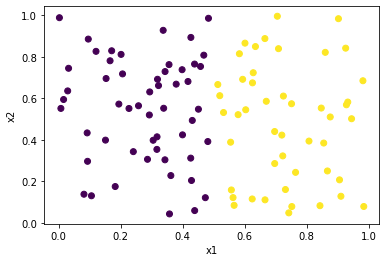

In [8]:
np.random.seed(123)
X = np.random.rand(100,2)
y = X[:,0] > 0.5
#data = np.concatenate((X, y.reshape(100,1)), axis=1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('x1')
plt.ylabel('x2');

- Entrainer un classifieur SVM linéaire (LinearSVC) et calculer l'accuracy

In [3]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X,y)
print(f'{svc.score(X,y)=}')

svc.score(X,y)=0.99


- Faire varier le paramètre C pour voir son effet sur le modèle 

In [4]:
for C in [10**k for k in range(-4,3)]:
    svc = LinearSVC(C=C, max_iter=10000)
    svc.fit(X,y)
    print(f'pour {C=} on a {svc.score(X,y)=}')

pour C=0.0001 on a svc.score(X,y)=0.93
pour C=0.001 on a svc.score(X,y)=0.93
pour C=0.01 on a svc.score(X,y)=0.91
pour C=0.1 on a svc.score(X,y)=0.96
pour C=1 on a svc.score(X,y)=0.99
pour C=10 on a svc.score(X,y)=1.0
pour C=100 on a svc.score(X,y)=1.0


- Faire un graphique avec l'ensemble de décision en utilisant une fonction `frontiere` à définir (le graphique doit donc représenter les points et les 2 espaces séparés par la frontière de décision)

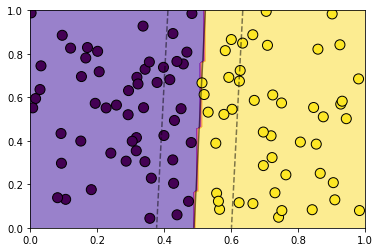

In [5]:
from utils import frontiere

svc = LinearSVC(C=10)
svc.fit(X,y)

frontiere(svc, supp_vect=False)
plt.scatter(X[:,0], X[:,1], c=y, s=100, edgecolor='black');

/home/elka/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/elka/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/elka/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


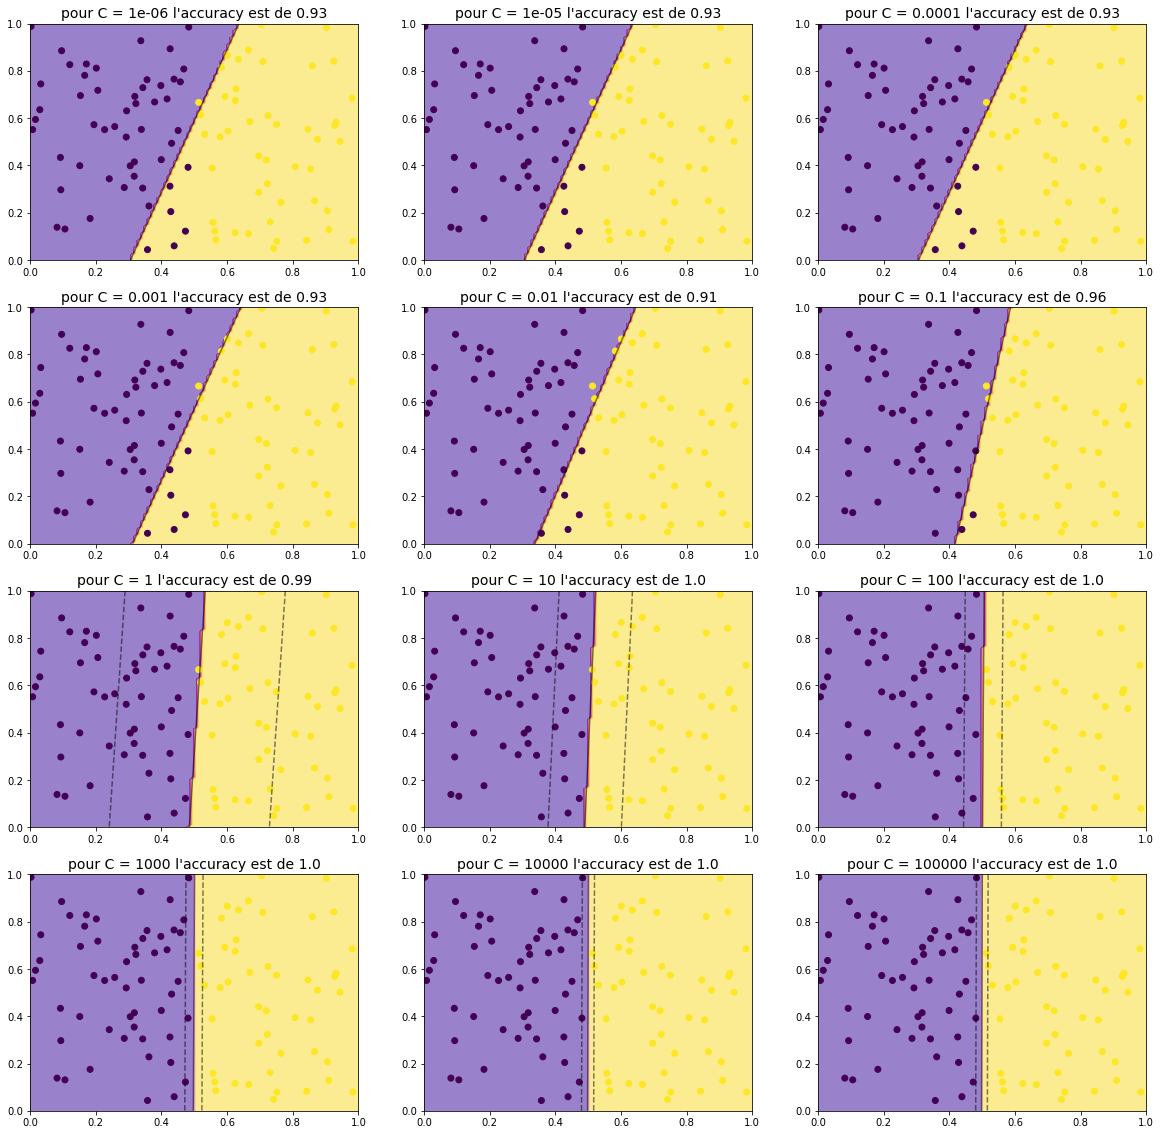

In [13]:
fig = plt.figure(figsize=(20,20))
idx_plt=1
for C in [10**k for k in range(-6,6)]:
    axi = fig.add_subplot(4,3,idx_plt)
    model = LinearSVC(C=C, max_iter=10000)
    model.fit(X,y)
    frontiere(model, ax=axi, supp_vect=False)
    plt.scatter(X[:,0],X[:,1],c=y)
    axi.set_title(f"pour C = {C} l'accuracy est de {model.score(X,y)}", fontsize=14)
    idx_plt += 1

- Sur cet ensemble, ajouter du bruit aux y (par exemple avec une probabilité p, yi = 1-yi)
- Afficher l'ensemble, entrainer un SVM linéaire (LinearSVC) et faire varier le paramètre C.

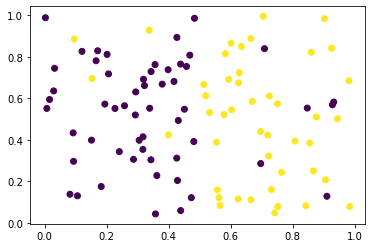

In [6]:
np.random.seed(123)
X = np.random.rand(100,2)
y = X[:,0] > 0.5

# o, choisit 10 observations au hasard pour lesquelles on va inverser y
obs_bruit = np.random.choice(range(len(y)),10)
y[obs_bruit] = 1 - y[obs_bruit]

plt.scatter(X[:,0], X[:,1], c=y);

In [7]:
for C in [10**k for k in range(-4,3)]:
    svc = LinearSVC(C=C, max_iter=10000)
    svc.fit(X,y)
    print(f'pour {C=} on a {svc.score(X,y)=}')

pour C=0.0001 on a svc.score(X,y)=0.56
pour C=0.001 on a svc.score(X,y)=0.58
pour C=0.01 on a svc.score(X,y)=0.76
pour C=0.1 on a svc.score(X,y)=0.87
pour C=1 on a svc.score(X,y)=0.87
pour C=10 on a svc.score(X,y)=0.86
pour C=100 on a svc.score(X,y)=0.84


# 2- Cas non linéaire : 

- Générer des données d'entrainement non linéairement séparable puis les afficher avec les couleurs. On peut utiliser : 
>- from sklearn.datasets import make_moons 
>- X, y = make_moons(noise = 0.1)

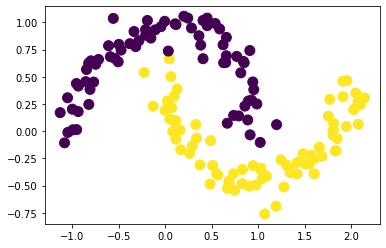

In [24]:
from sklearn.datasets import make_moons 
X, y = make_moons(n_samples=150, noise = 0.1, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, s=100);

- Générer de la même manière un échantillon de données de test

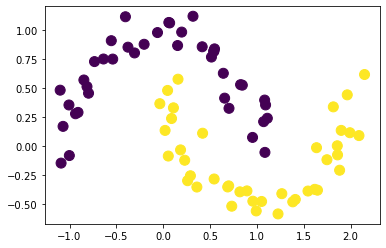

In [26]:
X_test, y_test = make_moons(n_samples=80, noise = 0.1, random_state=12)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=100);

- Entraîner un SVM avec les différents noyaux possibles et avec différentes valeurs de $C$.

In [27]:
from sklearn.svm import SVC

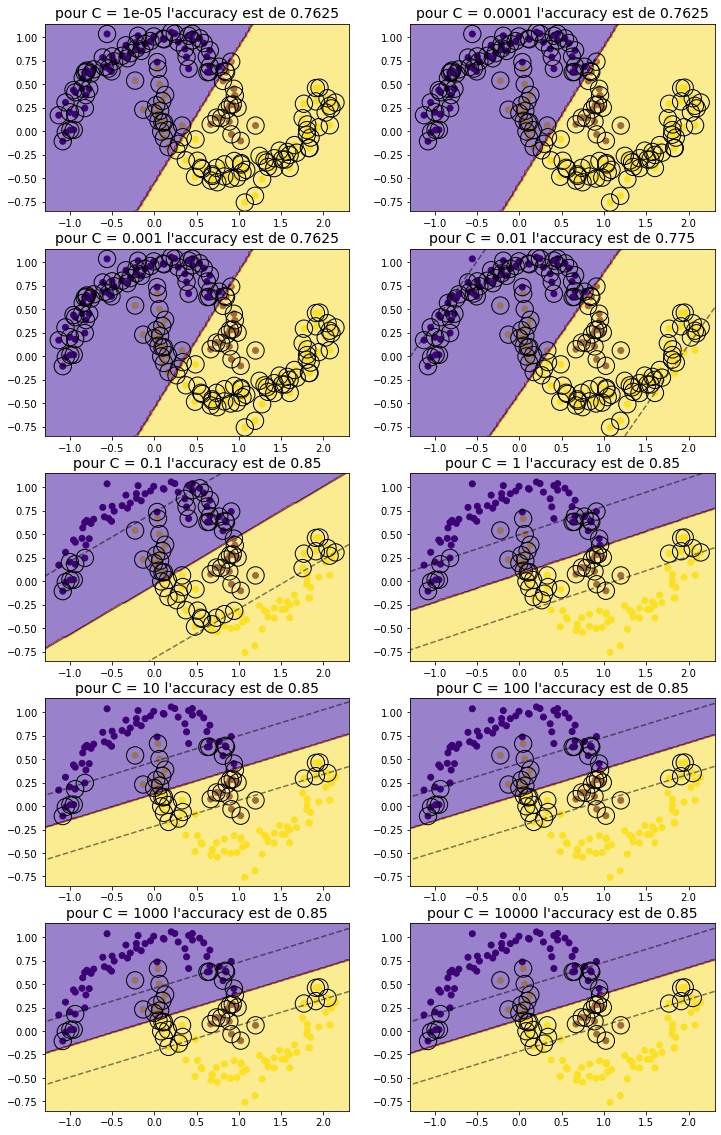

In [35]:
# kernel "linear"
fig = plt.figure(figsize=(12,20))
for i, C in enumerate([10**k for k in range(-5,5)]):
    axi = fig.add_subplot(5,2,i+1)
    model = SVC(C=C, kernel='linear')
    model.fit(X,y)
    plt.scatter(X[:,0],X[:,1],c=y)
    frontiere(model, ax=axi, supp_vect=True)
    axi.set_title(f"pour C = {C} l'accuracy est de {model.score(X_test,y_test)}", fontsize=14)

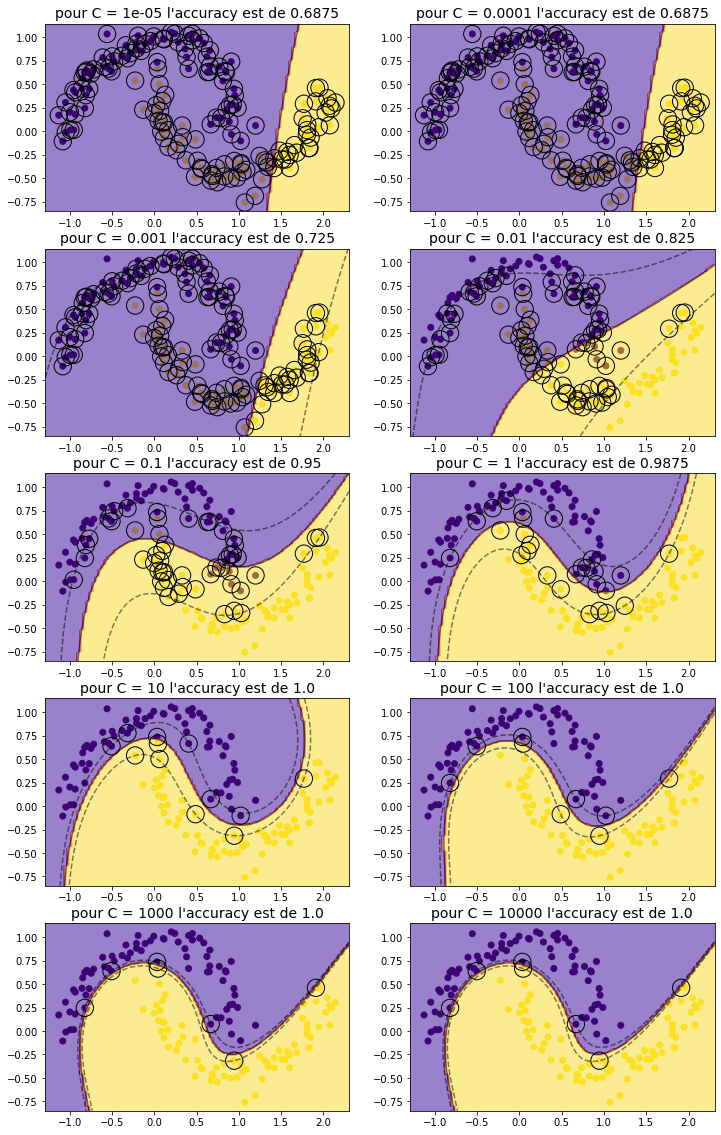

In [41]:
# kernel "poly"
fig = plt.figure(figsize=(12,20))
for i, C in enumerate([10**k for k in range(-5,5)]):
    axi = fig.add_subplot(5,2,i+1)
    model = SVC(C=C, kernel='poly', degree = 3, coef0=1)
    model.fit(X,y)
    plt.scatter(X[:,0],X[:,1],c=y)
    frontiere(model, ax=axi, supp_vect=True)
    axi.set_title(f"pour C = {C} l'accuracy est de {model.score(X_test,y_test)}", fontsize=14)

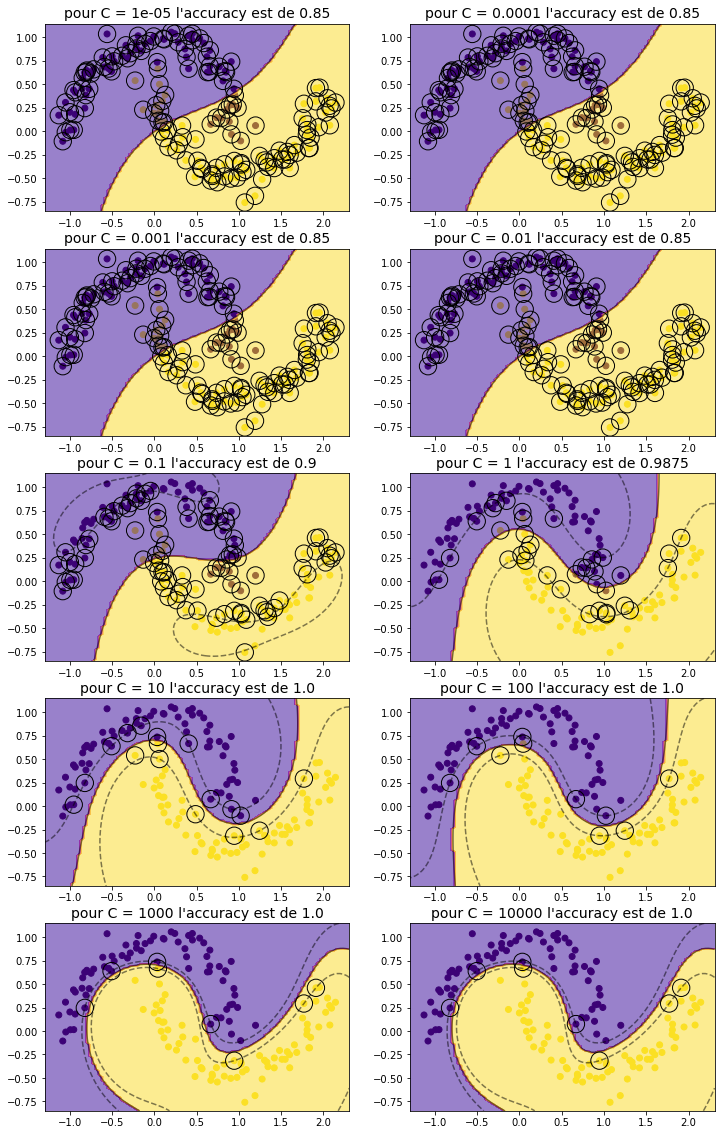

In [42]:
# kernel "rbf"
fig = plt.figure(figsize=(12,20))
for i, C in enumerate([10**k for k in range(-5,5)]):
    axi = fig.add_subplot(5,2,i+1)
    model = SVC(C=C, kernel='rbf')
    model.fit(X,y)
    plt.scatter(X[:,0],X[:,1],c=y)
    frontiere(model, ax=axi, supp_vect=True)
    axi.set_title(f"pour C = {C} l'accuracy est de {model.score(X_test,y_test)}", fontsize=14)

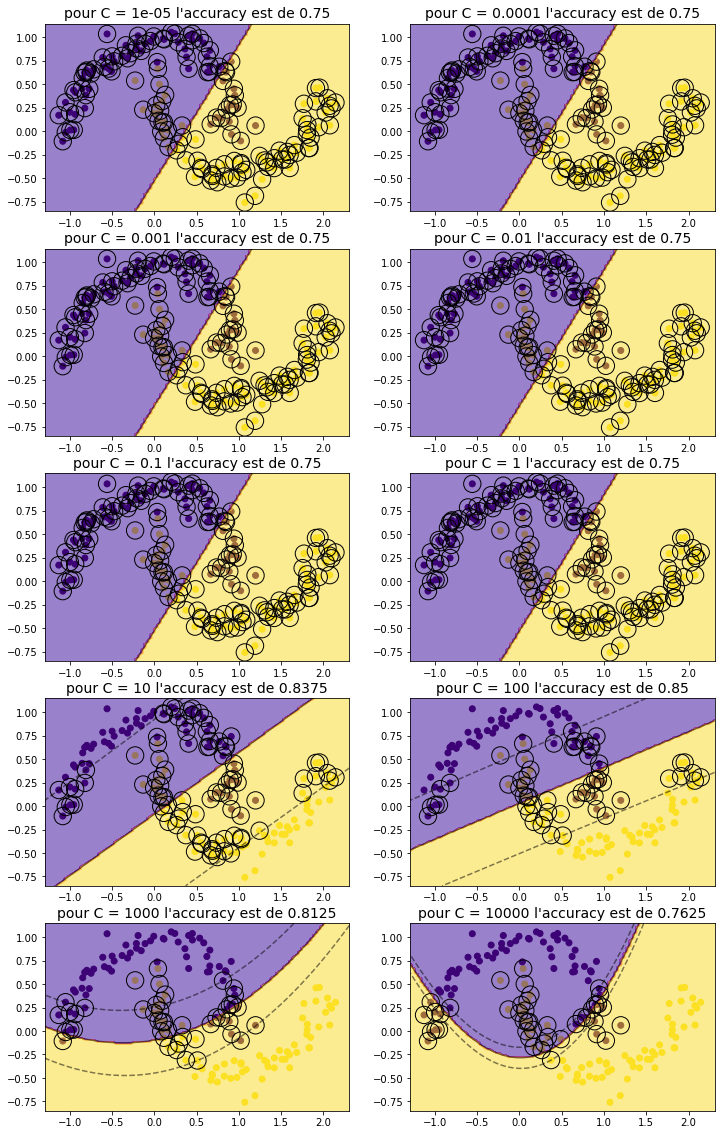

In [47]:
# kernel "sigmoid"
fig = plt.figure(figsize=(12,20))
for i, C in enumerate([10**k for k in range(-5,5)]):
    axi = fig.add_subplot(5,2,i+1)
    model = SVC(C=C, kernel='sigmoid', coef0=1, gamma=0.01)
    model.fit(X,y)
    plt.scatter(X[:,0],X[:,1],c=y)
    frontiere(model, ax=axi, supp_vect=True)
    axi.set_title(f"pour C = {C} l'accuracy est de {model.score(X_test,y_test)}", fontsize=14)

In [62]:
from sklearn.model_selection import GridSearchCV
model = SVC()

param_grid = {
    'C': [10**k for k in range(-3,4)],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], #'linear', sigmoid'
    'degree' : [3,4],
    'coef0' : [-1,-0.5,0,0.5,1],
    'gamma' : ['auto', 'scale', 0.1, 0.001, 0.0001]
}
grid = GridSearchCV(model, param_grid, n_jobs=-1)

%time grid.fit(X, y)
print(grid.best_params_)

CPU times: user 2.24 s, sys: 102 ms, total: 2.34 s
Wall time: 4.88 s
{'C': 1, 'coef0': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


In [63]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_coef0', 'param_degree', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

## 3. Une petite application sur les données de digits 

- Charger le jeu de données digits disponible dans sklearn
>- utiliser la fonction load_digits
>- regarder ce que contient le dataset
>- enregistrer les images dans une variables images
>- créer la matrice X à l'aide d'un reshape
>- créer le vecteur y à partir de l'attribut targets du dataset
- Afficher 8 images prises au hasard dans le jeu de données

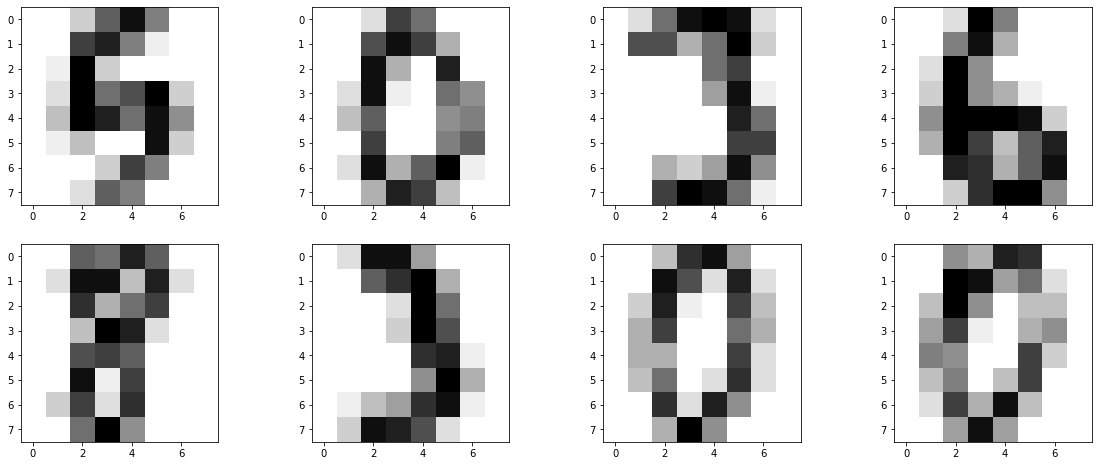

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
images = digits.images
n_samples = len(digits.images)

X = digits.data
y = digits.target

plt.figure(figsize=(20,8))
idx_plt=1
for image in images[np.random.choice(range(n_samples),8)]:
    plt.subplot(2,4,idx_plt)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    idx_plt+=1

- Découper le dataset en échantillons d'entraînement et de test
- Entrainer un kNN, une régression logistique et un SVM
- Comparer ces modèles
- Utiliser GridSearchCV pour affiner le choix des hyperparamètres

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

models = {
    'knn': KNeighborsClassifier(3),
    'reglog': LogisticRegression(max_iter=5000),
    'svc': SVC(gamma=0.001, C=1, kernel='rbf')
}

for k,v in models.items():
    model = v
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'scores de validation croisée du modèle {k} : {scores} / score moyen : {np.mean(scores)}')

scores de validation croisée du modèle knn : [0.97619048 0.99206349 0.97609562 0.99203187 0.98007968] / score moyen : 0.9832922279137419
scores de validation croisée du modèle reglog : [0.95634921 0.98015873 0.95219124 0.96812749 0.92828685] / score moyen : 0.957022702839436
scores de validation croisée du modèle svc : [0.98412698 0.99603175 0.99601594 0.99203187 0.98406375] / score moyen : 0.9904540567887181
